In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [14]:
# Load Data
file_path = r"C:\Users\Shikhar Paudel\Desktop\GIS-assignment\gis-data-science-assignment-shikharpaudel\data\climate_data_nepal_district_wise_monthly.csv"
data = pd.read_csv(file_path)

In [15]:
# Display first few rows
display(data.head())

DATE  YEAR  MONTH      DISTRICT   LAT   LON  PRECTOT     PS  QV2M  \
0  1981-01-31  1981      1  Arghakhanchi  27.9  83.2    67.31  93.78  5.28   
1  1981-02-28  1981      2  Arghakhanchi  27.9  83.2     3.37  93.52  5.13   
2  1981-03-31  1981      3  Arghakhanchi  27.9  83.2    26.02  93.40  5.91   
3  1981-04-30  1981      4  Arghakhanchi  27.9  83.2    46.15  93.03  6.52   
4  1981-05-31  1981      5  Arghakhanchi  27.9  83.2    69.45  92.75  9.95   

    RH2M  ...  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
0  53.09  ...      10.03  11.19   2.01       3.39       0.81         2.59   
1  40.88  ...      13.08  15.10   2.58       4.88       0.95         3.94   
2  35.84  ...      13.52  20.58   2.73       4.67       1.02         3.65   
3  29.81  ...      15.03  25.63   2.89       4.78       1.07         3.72   
4  37.25  ...      13.43  29.99   2.69       4.40       0.93         3.47   

   WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  
0   2.70       4.22       1.06         3.16  
1   3.51       5.62       1.09         4.53  
2   3.73       5.72       1.38         4.34  
3   3.82       5.66       1.35         4.31  
4   3.52       5.29       1.30         4.00  

[5 rows x 24 columns]

In [18]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'],format='%m/%d/%Y', errors='coerce')

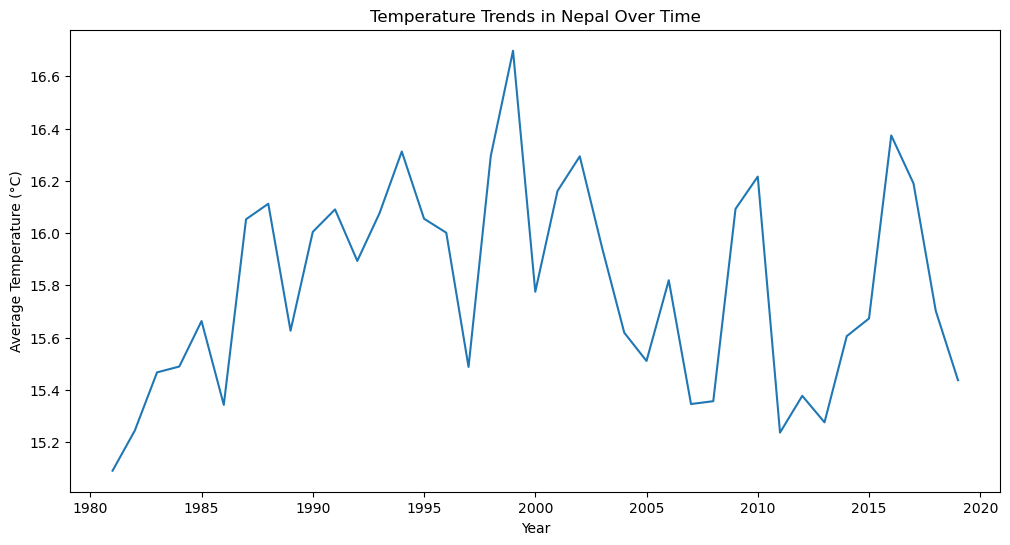

In [24]:
# Plot temperature trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YEAR', y='T2M', errorbar=None)
plt.title('Temperature Trends in Nepal Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

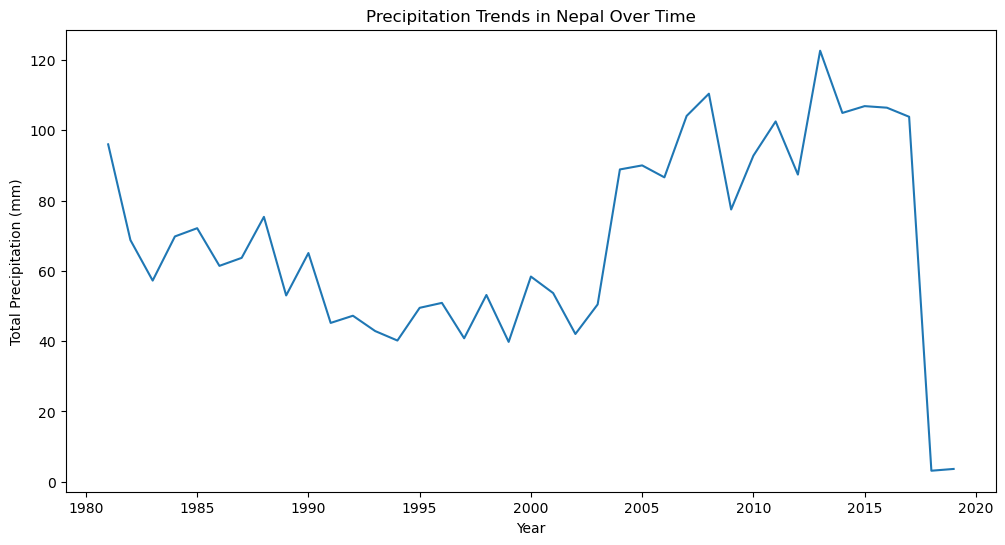

In [23]:
# Plot precipitation trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YEAR', y='PRECTOT', errorbar=None)
plt.title('Precipitation Trends in Nepal Over Time')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.show()

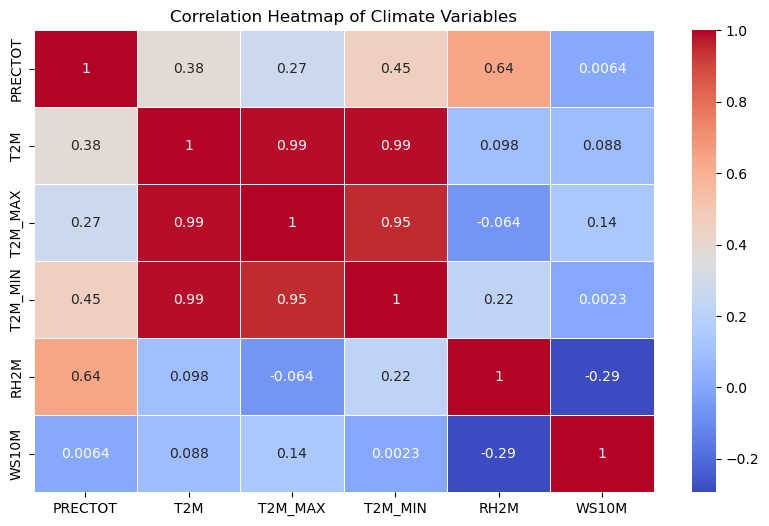

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['PRECTOT', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'WS10M']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

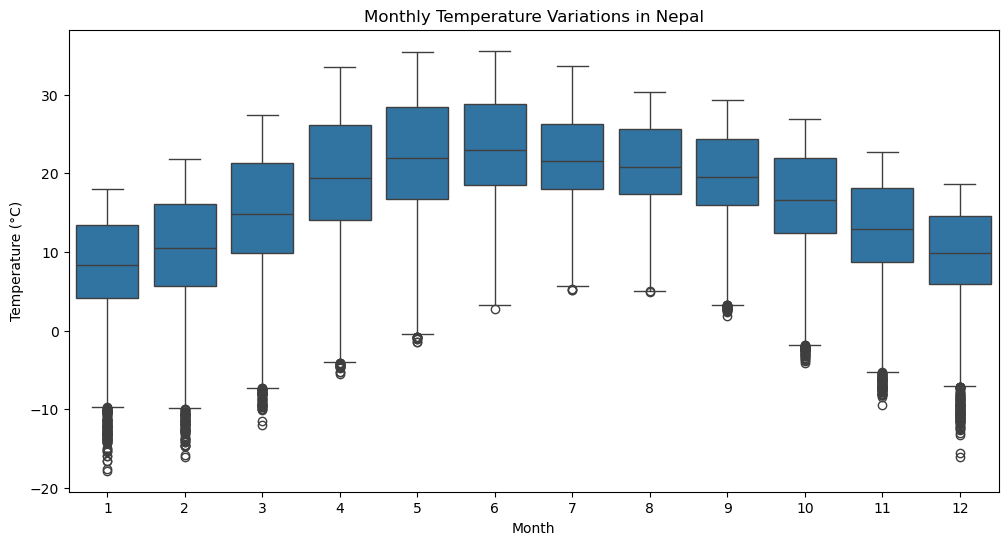

In [26]:
# Boxplot of temperature variations by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='MONTH', y='T2M')
plt.title('Monthly Temperature Variations in Nepal')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

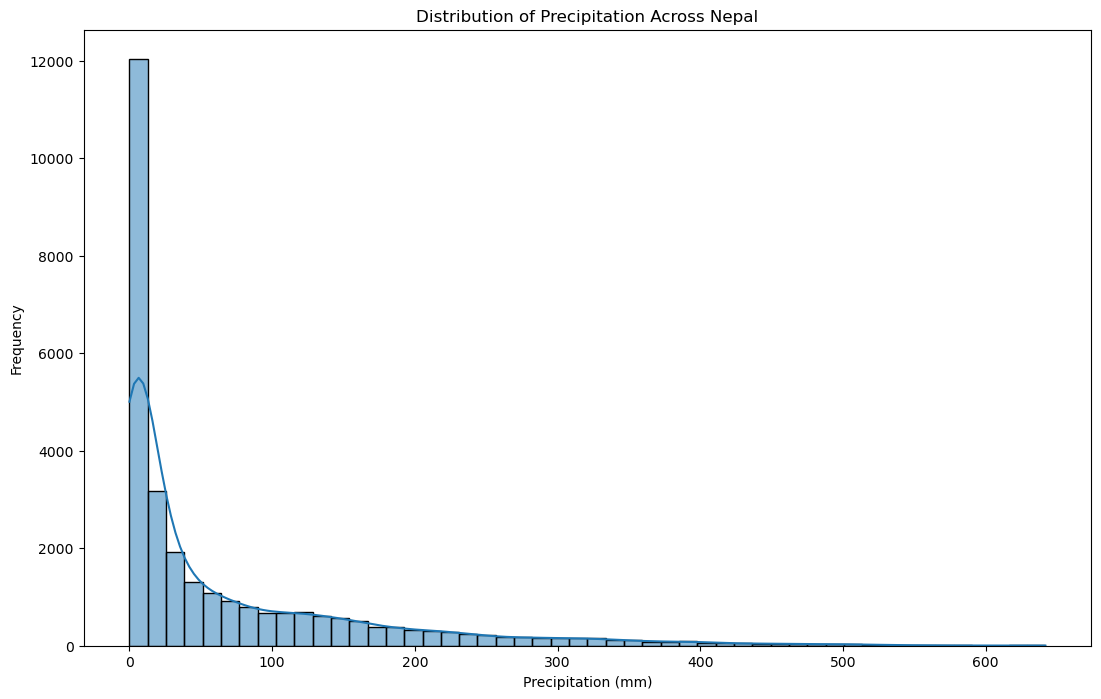

In [29]:
# Histogram of precipitation distribution
plt.figure(figsize=(13, 8))
sns.histplot(data['PRECTOT'], bins=50, kde=True)
plt.title('Distribution of Precipitation Across Nepal')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29016 entries, 0 to 29015
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         468 non-null    datetime64[ns]
 1   YEAR         29016 non-null  int64         
 2   MONTH        29016 non-null  int64         
 3   DISTRICT     29016 non-null  object        
 4   LAT          29016 non-null  float64       
 5   LON          29016 non-null  float64       
 6   PRECTOT      29016 non-null  float64       
 7   PS           29016 non-null  float64       
 8   QV2M         29016 non-null  float64       
 9   RH2M         29016 non-null  float64       
 10  T2M          29016 non-null  float64       
 11  T2MWET       29016 non-null  float64       
 12  T2M_MAX      29016 non-null  float64       
 13  T2M_MIN      29016 non-null  float64       
 14  T2M_RANGE    29016 non-null  float64       
 15  TS           29016 non-null  float64       
 16  WS10

In [48]:
from folium.plugins import HeatMap
# Initialize the map centered around Nepal
nepal_map = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Prepare the data for the map (latitude, longitude, temperature/precipitation)
locations = data[['LAT', 'LON', 'T2M']]

# Normalize the temperature data to set it as a color gradient
max_temp = locations['T2M'].max()
min_temp = locations['T2M'].min()

# Add temperature as heat points on the map (using folium's HeatMap)
heat_data = [[row['LAT'], row['LON'], (row['T2M'] - min_temp) / (max_temp - min_temp)] for index, row in locations.iterrows()]

HeatMap(heat_data).add_to(nepal_map)

nepal_map


In [47]:
# for precipation trend Prepare the data for the map (latitude, longitude, precipitation)
locations = data[['LAT', 'LON', 'PRECTOT']]

# Normalize the precipitation data
max_precip = locations['PRECTOT'].max()
min_precip = locations['PRECTOT'].min()

# Add precipitation as heat points on the map
heat_data = [[row['LAT'], row['LON'], (row['PRECTOT'] - min_precip) / (max_precip - min_precip)] for index, row in locations.iterrows()]

HeatMap(heat_data).add_to(nepal_map)

nepal_map


In [46]:
# Summary statistics
summary_stats = data[['PRECTOT', 'T2M', 'T2M_MAX', 'T2M_MIN']].describe()
display(summary_stats)

PRECTOT           T2M       T2M_MAX       T2M_MIN
count  29016.000000  29016.000000  29016.000000  29016.000000
mean      68.922705     15.795138     21.844415     11.033869
std       98.874269      9.044101      8.645676      9.209111
min        0.000000    -17.810000    -10.980000    -25.130000
25%        3.740000     10.027500     16.570000      5.360000
50%       22.050000     16.660000     22.510000     11.840000
75%       99.745000     22.390000     27.930000     17.860000
max      641.840000     35.590000     43.100000     29.480000

## Trends and Patterns in the data

### Mean Temperature (T2M) Over the Years:

- The mean temperature shows a general increasing trend over the years. This could indicate a warming trend in the climate data for Nepal.

### Total Precipitation (PRECTOT) Over the Years:

- The total precipitation varies significantly from year to year. There are periods of higher precipitation followed by periods of lower precipitation, indicating variability in rainfall patterns.

### Mean Relative Humidity (RH2M) Over the Years:

- The mean relative humidity shows some fluctuations over the years. There might be a slight decreasing trend, but it is not as pronounced as the temperature trend.

## Observations and Insights

### Temperature Increase:

- The increasing trend in mean temperature suggests that Nepal might be experiencing warming, which is consistent with global climate change patterns.

### Precipitation Variability:

- The variability in total precipitation indicates that there might be changes in the monsoon patterns or other climatic factors affecting rainfall. This could have implications for agriculture and water resources.

### Humidity Fluctuations:

- The fluctuations in mean relative humidity could be related to changes in temperature and precipitation. It is important to further investigate the causes of these fluctuations.